In [13]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout, Activation
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [14]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'MyDrive'
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
'August Budget.gsheet'
 bigdata_project.gslides
 checkmodel.h5
 CN_Research.gdoc
'Colab Notebooks'/
 Cover_letter_Vijay_ML.pdf
'Data from Marketing Team.csv'
'Data from Marketing Team.xlsx'
'DATA VISUALIZATION.gslides'
'Declaration Form.gdoc'
'Declaration Form.pdf'
 Documents/
'GSA Contract signed.pdf'
 Homework05_partII_train.csv
 IMG-2223.jpg
 IMG_2934.MOV
'India things.gsheet'
 Ispraak_documentation.gdoc
'Machine Learning Midterm Revision.gdoc'
'May Budget.gsheet'
'ML Udemy course notes.gdoc'
'Money Compensation.gsheet'
'Music Genre .ipynb'
'Nonimmigrant Visa - Confirmation Page - Vijay Varshini.pdf'
 NYC.gdoc
 Resume.gdoc
'Science project.gslides'
'speech recognition.gslides'
'Technical Debts.gdoc'
 test.tsv
'To-do list.gsheet'
 train-v2.tsv
 Untitled0.ipynb
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled documen

In [15]:
test_df = pd.read_csv('test.tsv', sep="\t", header=None, quoting = csv.QUOTE_NONE)
test_df

,0,1
0,0,"@USER @USER nos sadwrn dwi fyd, rudimental a e..."
1,1,@USER @USER haia! Pob hwyl fory hogs. Cofiwch ...
2,0,Loner trwy'r dydd heddiw yn ddiolchgar am cwmm...
3,1,"@USER good news, ma'r braid yn cal aros miwn! ..."
4,1,@USER Wi'n gobeithio ti'n cael nadolig gwych g...
...,...,...
9995,1,@USER Ahh scary D: Swni'n ofn mynd mwy na 10mp...
9996,0,Ma'n neud i fi deimlo bach yn sâl mod i rwan w...
9997,0,"So ma Bac fi di gal ei ddewis i yrru ffwrdd, gret"
9998,1,Bore da a diolch am ein dilyn @USER a @USER! B...


In [16]:
test_df.rename(columns={0: 'Target', 1: 'Text'}, inplace=True)
test_df

,Target,Text
0,0,"@USER @USER nos sadwrn dwi fyd, rudimental a e..."
1,1,@USER @USER haia! Pob hwyl fory hogs. Cofiwch ...
2,0,Loner trwy'r dydd heddiw yn ddiolchgar am cwmm...
3,1,"@USER good news, ma'r braid yn cal aros miwn! ..."
4,1,@USER Wi'n gobeithio ti'n cael nadolig gwych g...
...,...,...
9995,1,@USER Ahh scary D: Swni'n ofn mynd mwy na 10mp...
9996,0,Ma'n neud i fi deimlo bach yn sâl mod i rwan w...
9997,0,"So ma Bac fi di gal ei ddewis i yrru ffwrdd, gret"
9998,1,Bore da a diolch am ein dilyn @USER a @USER! B...


In [17]:
username=['@USER']
#This piece of code was taken from https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in username])
test_df['Text'] = test_df['Text'].apply(lambda text: cleaning_stopwords(text))
test_df['Text'].head()

0    nos sadwrn dwi fyd, rudimental a ella yn suppo...
1    haia! Pob hwyl fory hogs. Cofiwch wenu. Welai ...
2    Loner trwy'r dydd heddiw yn ddiolchgar am cwmm...
3    good news, ma'r braid yn cal aros miwn! Haha! ...
4    Wi'n gobeithio ti'n cael nadolig gwych gyda ei...
Name: Text, dtype: object

In [18]:
punct_list=string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punct_list)
    return text.translate(translator)
test_df['Text']= test_df['Text'].apply(lambda x: cleaning_punctuations(x))
test_df['Text'].head()

0    nos sadwrn dwi fyd rudimental a ella yn suppor...
1    haia Pob hwyl fory hogs Cofiwch wenu Welai chi...
2    Loner trwyr dydd heddiw yn ddiolchgar am cwmmn...
3    good news mar braid yn cal aros miwn Haha Dwin...
4    Win gobeithio tin cael nadolig gwych gyda eich...
Name: Text, dtype: object

In [19]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [20]:
import nltk
import re
from nltk.stem import PorterStemmer
from string import punctuation

porter=PorterStemmer()
def tweet_to_words(tweet):  
   # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    #emove punctuation
    text = re.sub(f"[{re.escape(punctuation)}]", "", tweet)
    # tokenize
    words = text.split()
    # apply stemming
    words = [porter.stem(w) for w in words]
    #remove emoji
    for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji]) 
    # return list
    return words


print("\nOriginal tweet ->", test_df['Text'][0])
print("\nProcessed tweet ->", tweet_to_words(test_df['Text'][0]))


Original tweet -> nos sadwrn dwi fyd rudimental a ella yn supportio nwn mnd i fod n imens Oooond bastille whatapickle

Processed tweet -> ['no', 'sadwrn', 'dwi', 'fyd', 'rudiment', 'a', 'ella', 'yn', 'supportio', 'nwn', 'mnd', 'i', 'fod', 'n', 'imen', 'oooond', 'bastil', 'whatapickl']


In [23]:
X = list(map(tweet_to_words, test_df['Text']))

In [25]:
from sklearn.preprocessing import LabelEncoder
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(test_df['Target'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [27]:
words=test_df['Text'].tolist()
word2 = ' '.join([str(element) for element in words]) 

In [28]:
length_test = len(word2)
length_test

675479

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 500

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
                                ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train_new = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test_new = count_vector.transform(X_test).toarray()

In [31]:
print(count_vector.get_feature_names()[0:2])

['1', '10']


In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', test_df['Text'][0])
X, tokenizer = tokenize_pad_sequences(test_df['Text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 nos sadwrn dwi fyd rudimental a ella yn supportio nwn mnd i fod n imens Oooond bastille whatapickle
After Tokenization & Padding 
 [  70  272   12   87    3  286    1 1301 1095    2   33   92 4579    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [35]:
maxlen = 100
X_train_pad = pad_sequences(X_train_new, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_new, padding='post', maxlen=maxlen)
X_train_pad.shape

(6400, 100)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train_pad, y_train)
l_pred=clf.predict(X_test_pad)
print(accuracy_score(y_test, l_pred))

0.577


In [38]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D 
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras import layers

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

vocab_size=5000
maxlen=100
embedding_dim=50


model = Sequential() # create Sequential model
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(LSTM(100,dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history = model.fit(X_train_pad,y_train, validation_split=0.1, batch_size = 10, epochs = 7, callbacks=keras_callbacks)

Epoch 1/7
576/576 [==============================] - 83s 139ms/step - loss: 0.6940 - accuracy: 0.4991 - val_loss: 0.6943 - val_accuracy: 0.4844
Epoch 2/7
576/576 [==============================] - 82s 142ms/step - loss: 0.6930 - accuracy: 0.5016 - val_loss: 0.6955 - val_accuracy: 0.4859
Epoch 3/7
576/576 [==============================] - 78s 136ms/step - loss: 0.6915 - accuracy: 0.5075 - val_loss: 0.6946 - val_accuracy: 0.4891
Epoch 4/7
576/576 [==============================] - 76s 133ms/step - loss: 0.6905 - accuracy: 0.5155 - val_loss: 0.6986 - val_accuracy: 0.4922
Epoch 5/7
576/576 [==============================] - 78s 136ms/step - loss: 0.6899 - accuracy: 0.5115 - val_loss: 0.6955 - val_accuracy: 0.5094
Epoch 6/7
576/576 [==============================] - 79s 137ms/step - loss: 0.6893 - accuracy: 0.5189 - val_loss: 0.6941 - val_accuracy: 0.5359
Epoch 7/7
576/576 [==============================] - 78s 136ms/step - loss: 0.6886 - accuracy: 0.5122 - val_loss: 0.6958 - val_accuracy:

In [40]:
pred_model_test = model.predict(X_test_pad)

In [41]:
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5200
Testing Accuracy:  0.5300


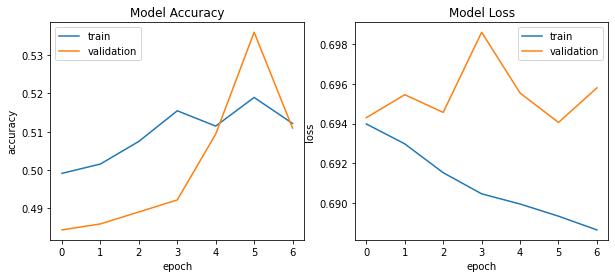

In [42]:
import matplotlib.pyplot as plt
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(train_history)